#### Data Load

In [1]:
# Code origin by KJH3024 at GitHub

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # 경고 무시

pd.options.display.max_columns = None

# Load Data
df = pd.read_csv('../../csv_data/use/00_real_true_data.csv', thousands=",", encoding='CP949')
df['회계년도'] = pd.to_datetime(df['회계년도'], format='%Y-%m').dt.strftime('%Y')
df.head(3)

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율,통계청 한국표준산업분류 10차(소분류),매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업1,회생기업2
0,CMG제약,58820,2011,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-46.08,-24.07,-213.61,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,0.13,의약품 제조업,1,0,0,0,0,0,0.0,0.0
1,CMG제약,58820,2012,-7.75,109.15,-4.12,207.08,75.17,-8.43,28.34,-40.97,-26.84,-9.96,-25.87,-15.78,0.39,4.09,1.75,1.71,7.83,0.66,0.93,0.52,0.81,693.49,649.98,68.81,80.77,0.18,-8.10,-12.71,-2066.51,55.32,77.32,82.49,323.41,21.50,44.68,6.27,7.33,70.60,69458.82,32002.75,426.18,0.000000,0.47,1.66,2009.78,0.74,의약품 제조업,0,0,0,0,1,1,0.0,0.0
2,CMG제약,58820,2013,0.70,-2.09,16.09,-18.89,55.10,25.51,38.70,1.45,0.74,1.40,3.88,0.52,0.36,3.30,2.02,2.03,6.20,0.51,1.26,0.48,1.25,694.71,610.74,394.63,14.11,0.00,-39.85,-13.51,0.00,87.63,60.08,68.34,282.72,11.23,12.37,12.09,14.12,58.50,66012.04,33789.62,411.12,77.914703,12.51,34.29,51433.09,0.66,의약품 제조업,0,0,0,0,0,0,0.0,0.0


#### 결측치 확인

<AxesSubplot:>

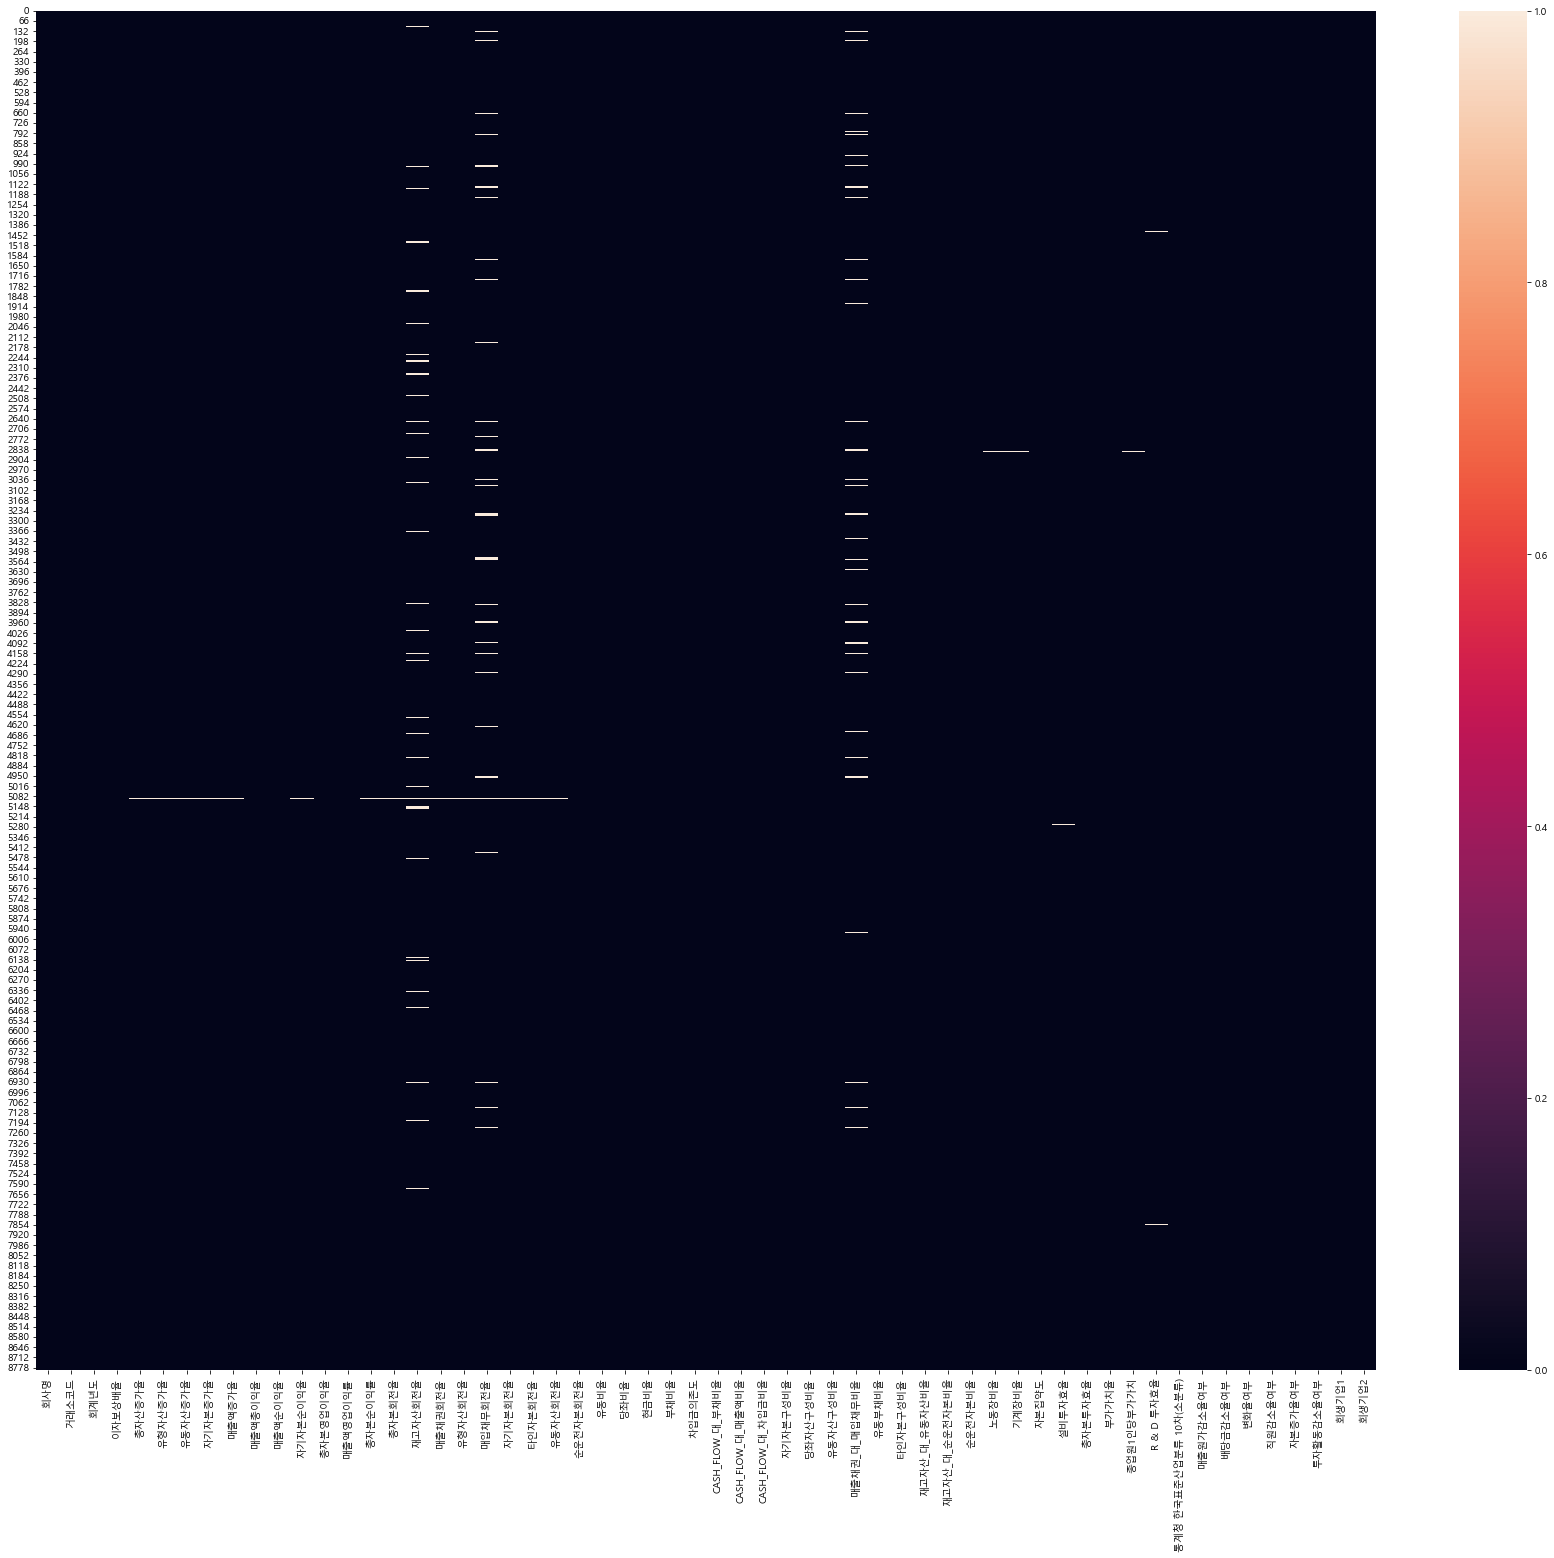

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글 깨짐 방지
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

In [3]:
# 남은 결측치를 평균으로 채워넣고 다시 확인

medi = lambda x: x.fillna(x.mean())
df = df.groupby('회사명').apply(medi)
df = df.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
이자보상배율                   0
총자산증가율                   0
유형자산증가율                  0
유동자산증가율                  0
자기자본증가율                  0
매출액증가율                   0
매출액총이익율                  0
매출액순이익율                  0
자기자본순이익율                 0
총자본영업이익율                 0
매출액영업이익률                 0
총자본순이익률                  0
총자본회전율                   0
재고자산회전율                  0
매출채권회전율                  0
유형자산회전율                  0
매입채무회전율                  0
자기자본회전율                  0
타인자본회전율                  0
유동자산회전율                  0
순운전자본회전율                 0
유동비율                     0
당좌비율                     0
현금비율                     0
부채비율                     0
차입금의존도                   0
CASH_FLOW_대_부채비율         0
CASH_FLOW_대_매출액비율        0
CASH_FLOW_대_차입금비율        0
자기자본구성비율                 0
당좌자산구성비율                 0
유동자산구성비율                 0
매출채권_대_매입채무비율            0
유동부채비율                   0
타

#### 이상치 확인

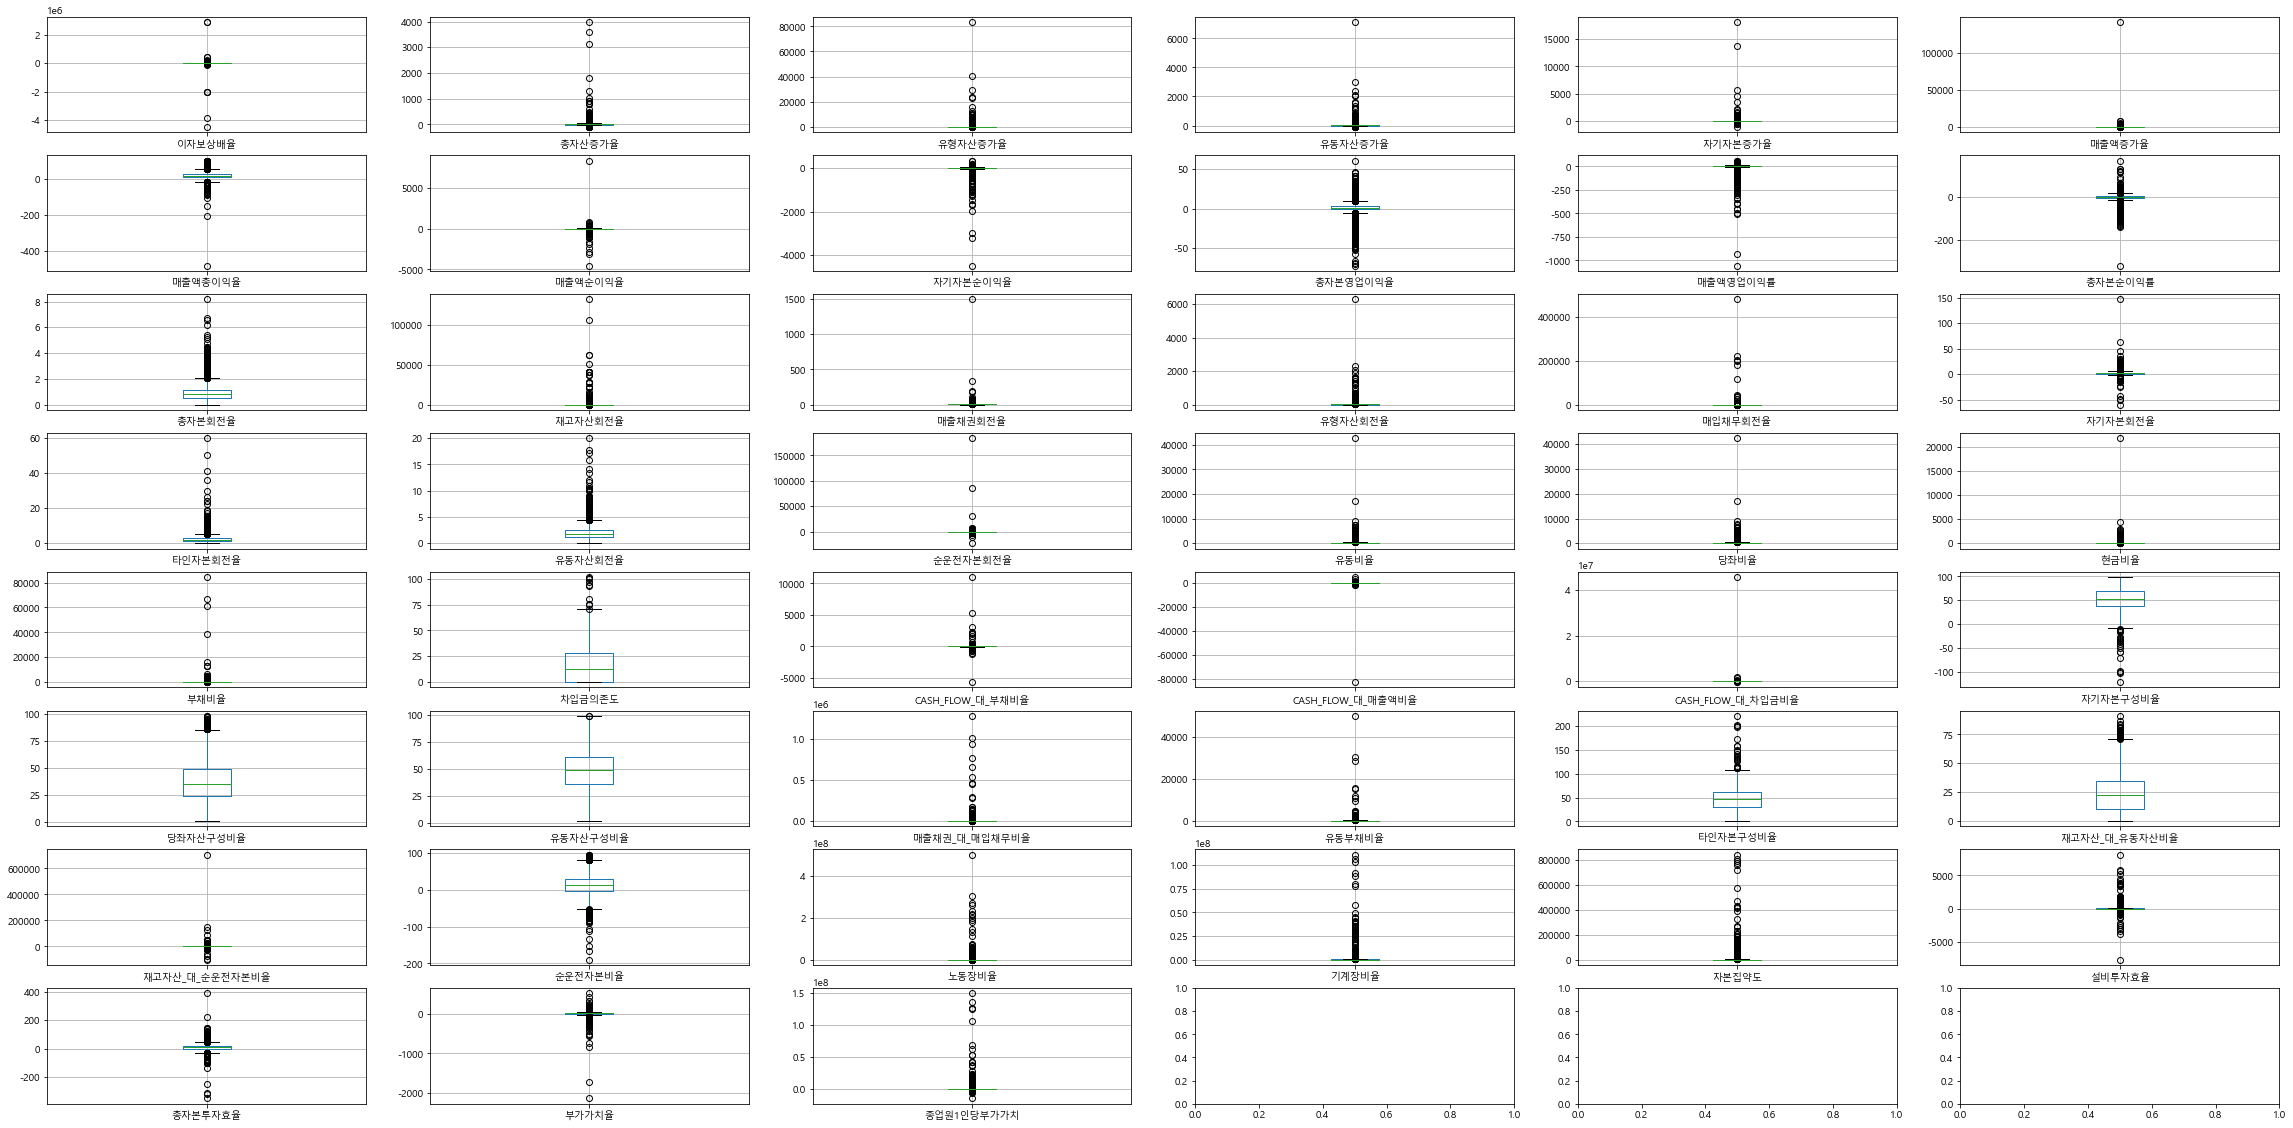

In [4]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

In [5]:
# 윈저라이징을 통한 이상치 조정

from scipy.stats.mstats import winsorize
df1 = df.iloc[:, 3:49]
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

# 통계청 ~ 반정형 : df.iloc[:, 49:]

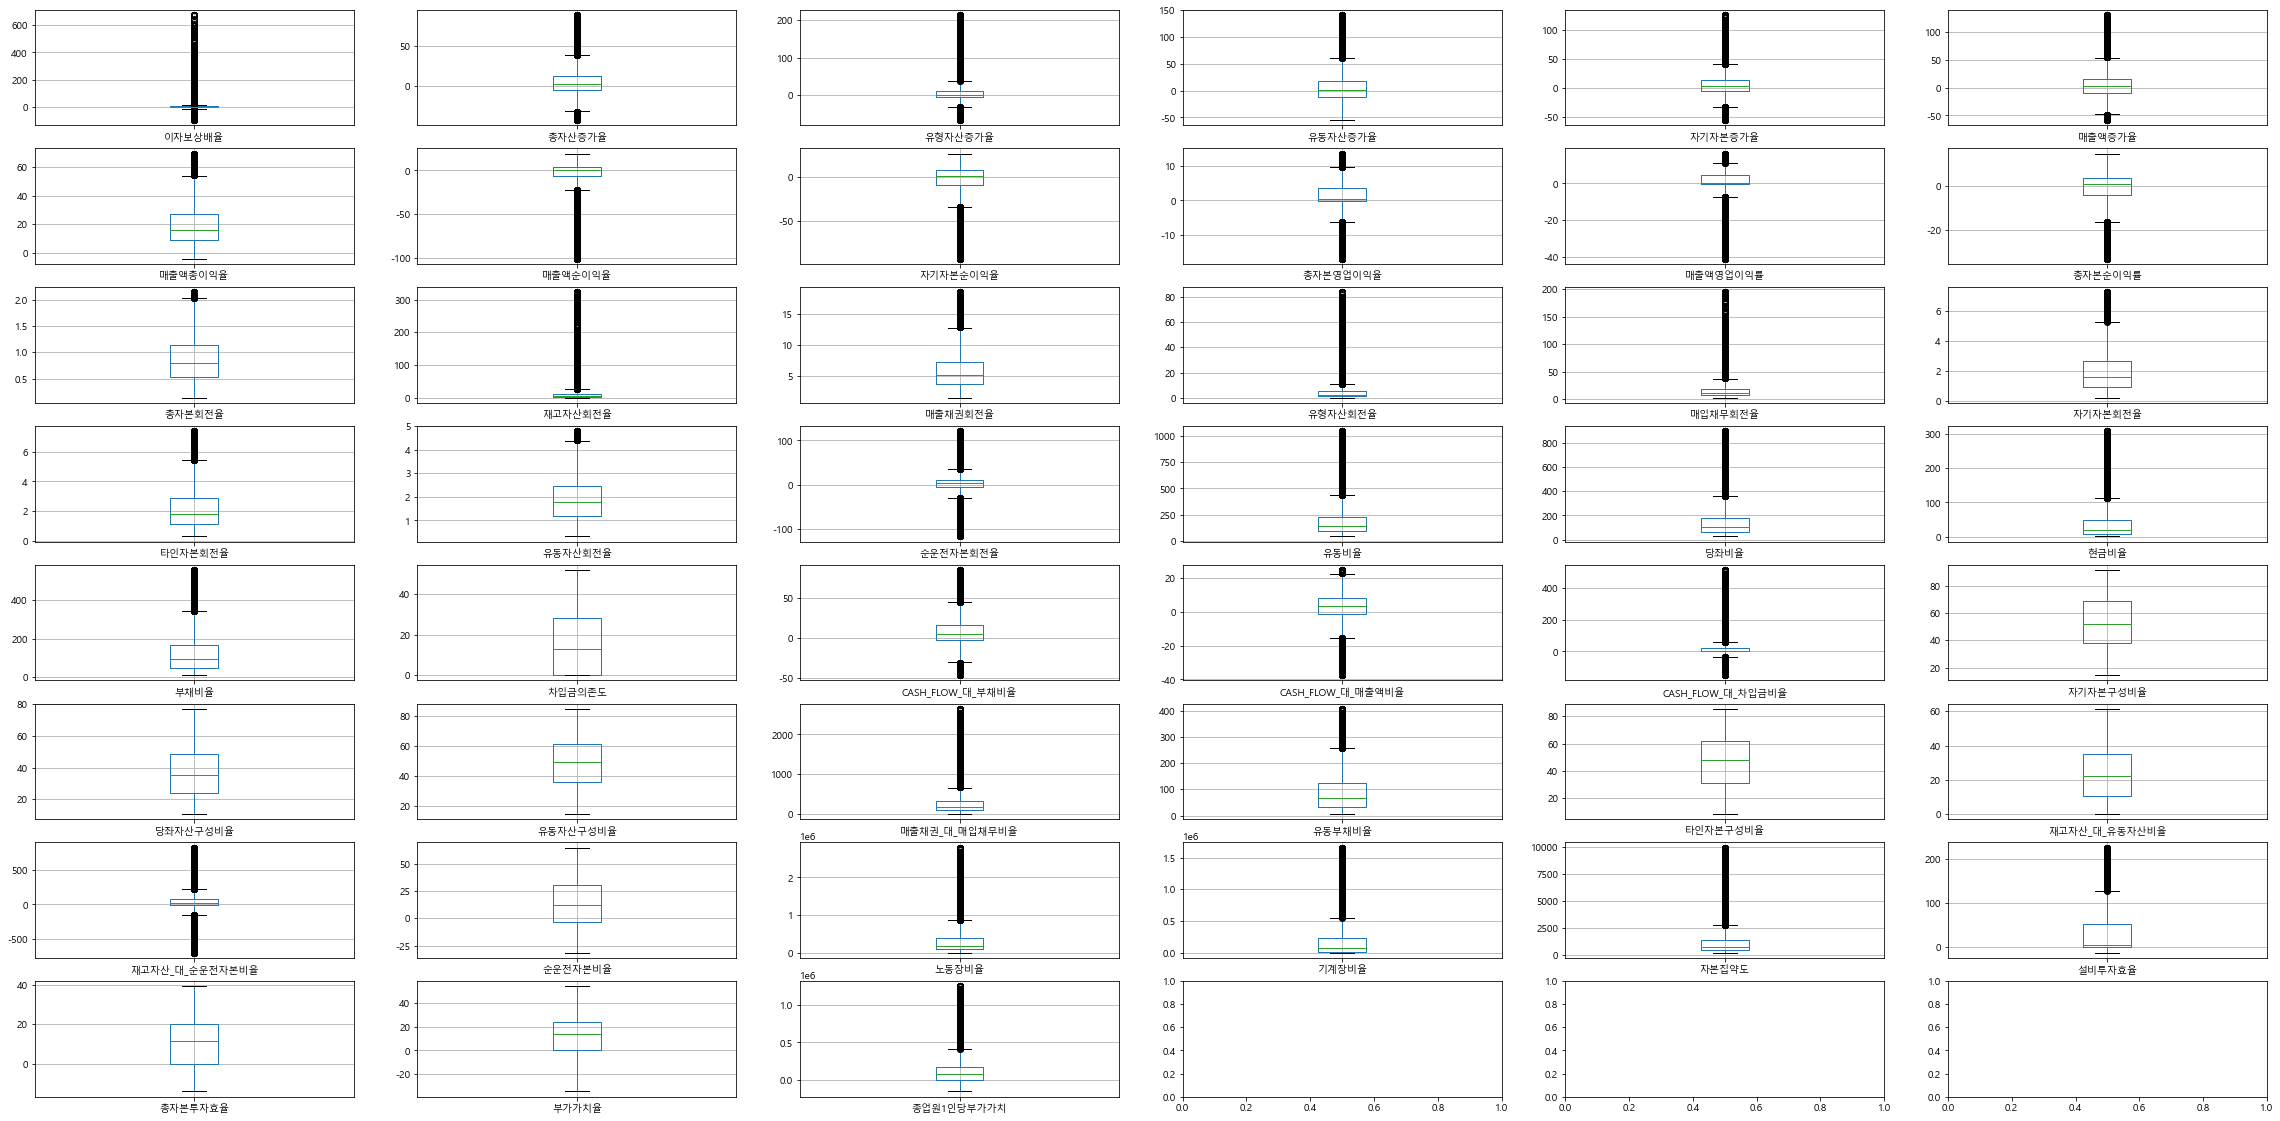

In [6]:
# 재확인
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

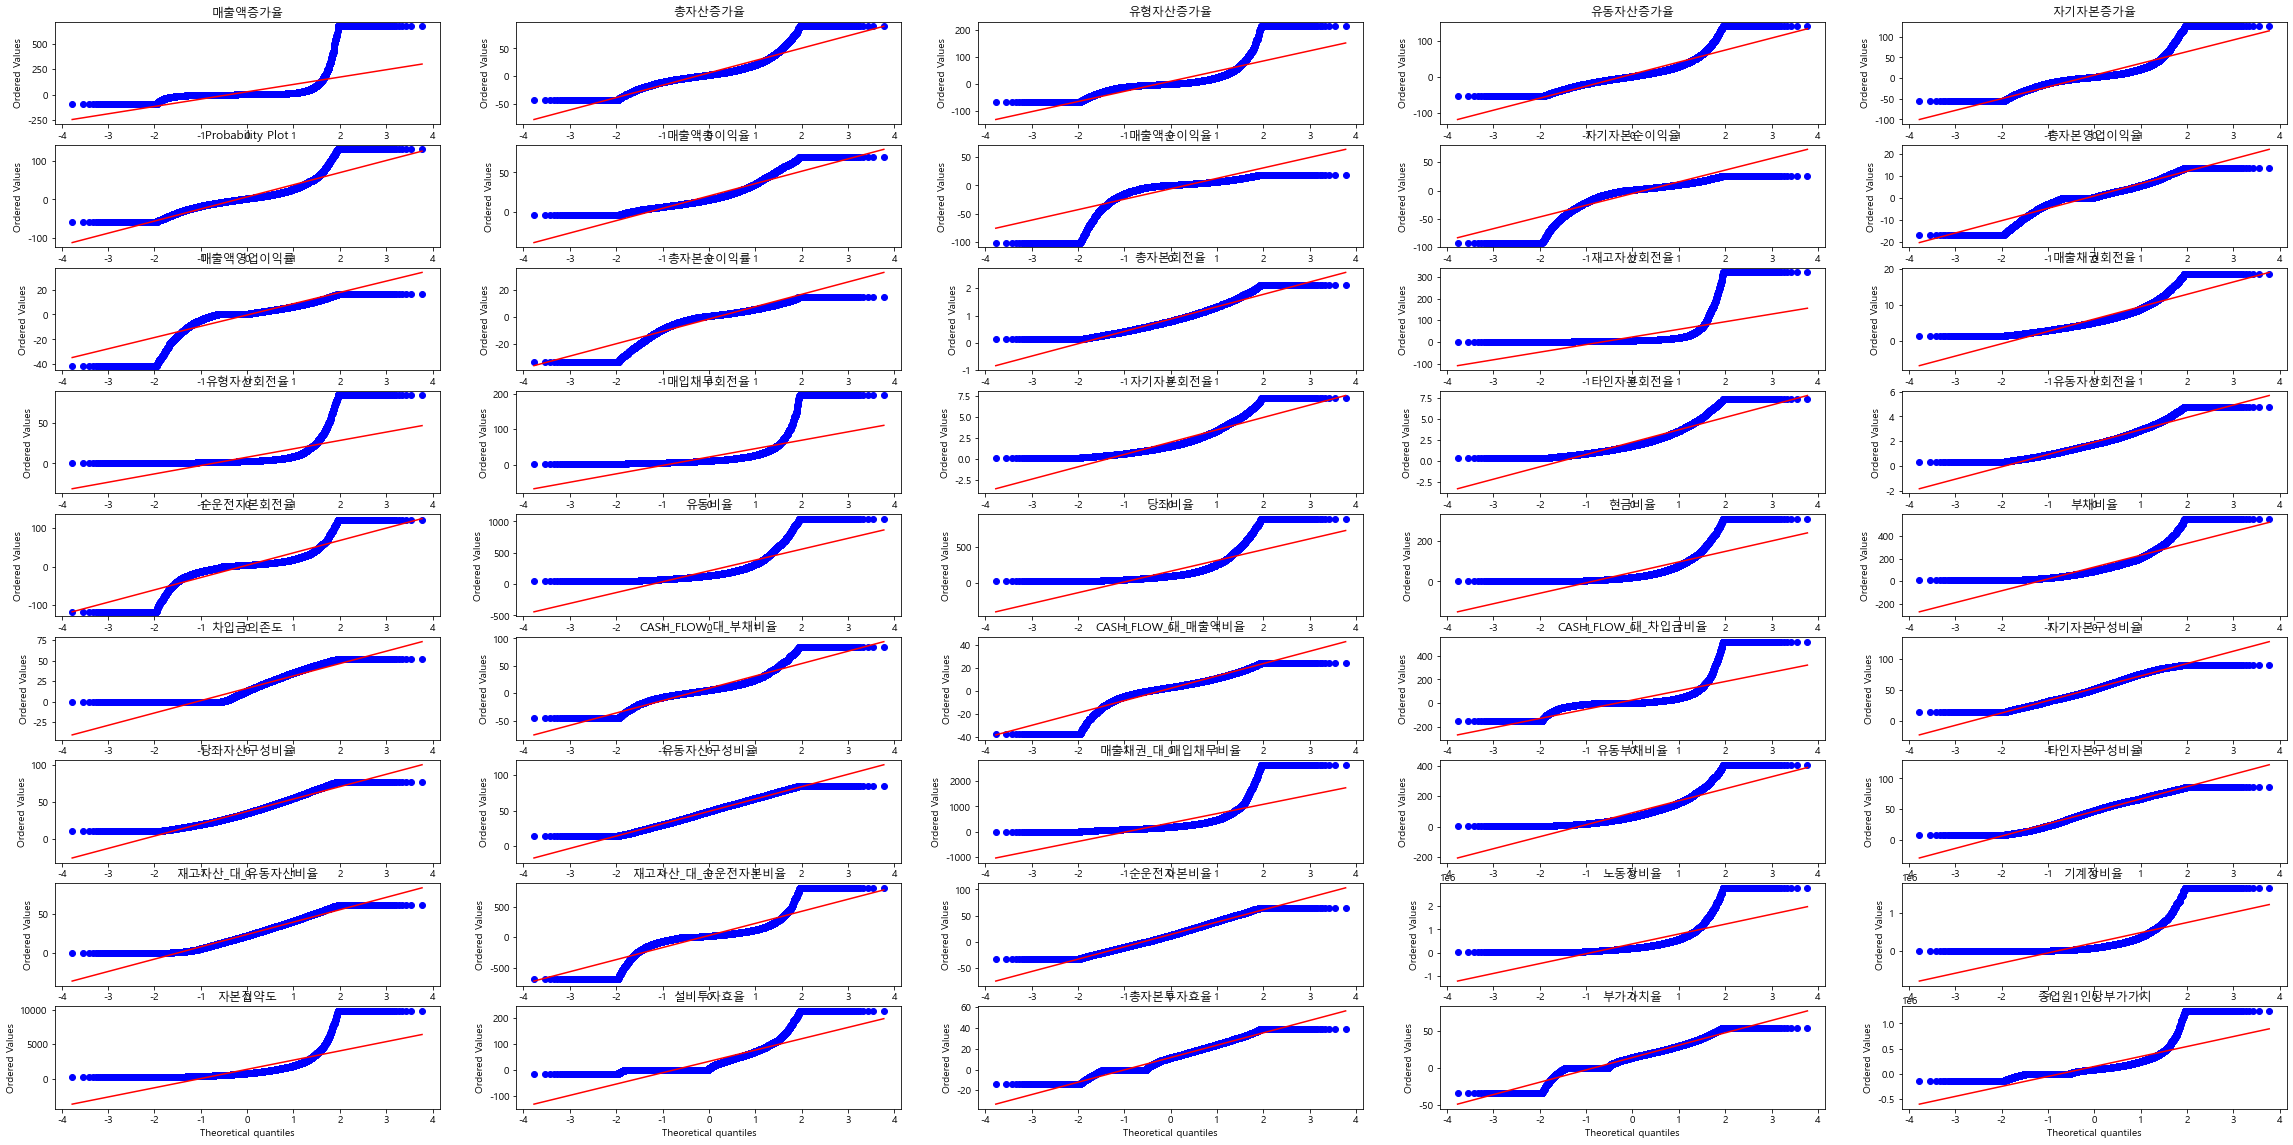

In [7]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")

plt.show()

In [8]:
# feature 후보 입장

temp = df1[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치']]

x = pd.concat([df['회계년도'], temp], axis=1)
x = pd.concat([x, df.iloc[:, 50:]], axis=1)
x

,회계년도,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업1,회생기업2
0,2011,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-45.97,-24.07,-150.29,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,1,0,0,0,0,0,0.0,0.0
1,2012,89.70,-4.12,141.23,75.17,-8.43,28.34,-40.97,-26.84,-9.96,-25.87,-15.78,0.39,4.09,1.75,1.71,7.83,0.66,0.93,0.52,0.81,693.49,649.98,68.81,80.77,0.18,-8.10,-12.71,-150.29,55.32,77.18,82.49,323.41,21.50,44.68,6.27,7.33,65.26,69458.82,32002.75,426.18,0.000000,0.47,1.66,2009.78,0,0,0,0,1,1,0.0,0.0
2,2013,-2.09,16.09,-18.89,55.10,25.51,38.70,1.45,0.74,1.40,3.88,0.52,0.36,3.30,2.02,2.03,6.20,0.51,1.26,0.48,1.25,694.71,610.74,309.08,14.11,0.00,-39.85,-13.51,0.00,87.63,60.08,68.34,282.72,11.23,12.37,12.09,14.12,58.50,66012.04,33789.62,411.12,77.914703,12.51,34.29,51433.09,0,0,0,0,0,0,0.0,0.0
3,2014,3.86,74.30,-25.93,0.01,11.52,37.07,0.69,0.32,0.78,1.94,0.28,0.40,3.00,1.85,1.54,5.27,0.46,2.85,0.68,2.32,324.58,268.23,101.24,18.50,0.01,-17.73,-7.06,-150.29,84.39,40.28,48.74,285.31,17.79,15.61,17.36,25.09,33.72,113899.65,48479.94,354.08,37.802533,12.16,31.04,43056.95,0,0,0,1,0,0,0.0,0.0
4,2015,-2.64,-5.37,-7.17,-4.48,18.85,36.26,-13.50,-7.62,-4.49,-9.51,-6.37,0.47,3.32,2.09,1.48,5.66,0.56,2.88,0.99,3.10,296.85,235.21,29.00,20.78,0.01,16.12,5.80,516.75,82.80,36.82,46.47,254.69,18.91,17.20,20.77,31.32,30.82,114246.59,53386.77,362.39,0.000000,7.63,15.96,27662.63,0,0,0,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,2014,13.69,45.19,-13.68,7.76,7.17,5.61,2.22,11.37,3.04,2.25,3.01,1.35,56.41,14.83,3.02,17.07,5.11,1.84,4.78,-20.19,65.25,59.64,8.09,287.83,29.09,2.84,1.66,7.23,25.78,21.60,23.63,66.36,140.48,74.22,8.60,-16.14,-12.59,428397.42,15.32,859.92,27.875663,13.89,10.93,119418.62,0,0,0,0,0,0,0.0,0.0
8588,2015,21.93,49.36,-11.18,3.39,2.42,6.20,1.24,6.18,2.95,2.51,1.46,1.17,64.23,17.20,2.09,16.05,4.96,1.54,4.78,-13.39,51.92,47.54,7.76,357.39,24.52,2.78,2.03,8.85,21.86,15.76,17.21,60.44,151.66,78.14,8.43,-9.10,-15.94,593960.16,14.23,973.73,21.494004,13.11,12.28,127665.82,0,0,0,0,0,0,0.0,0.0
8589,2016,21.08,38.84,-25.08,11.22,-1.58,4.49,-2.06,-9.40,0.67,0.71,-1.96,0.95,53.94,17.35,1.44,16.26,4.55,1.20,4.78,-10.62,42.30,32.52,5.46,397.97,19.03,2.12,1.96,8.92,20.08,10.73,14.86,68.73,134.41,79.92,17.60,-11.47,-16.34,706868.14,12.28,1017.55,15.812610,10.98,12.66,111774.30,0,1,0,0,0,1,0.0,0.0
8590,2017,-11.43,-16.50,13.29,-39.28,0.56,2.09,-8.79,-47.52,-1.45,-1.57,-8.13,0.93,43.17,15.61,1.36,15.39,5.41,1.12,4.78,-8.05,42.30,29.58,6.17,556.71,22.90,-0.57,-0.50,-2.13,14.66,11.27,14.86,65.00,276.77,85.34,17.27,-9.61,-24.48,599097.86,12.56,921.78,8.349918,5.43,5.51,50024.18,0,0,0,0,0,0,0.0,0.0


In [9]:
x.sort_values(by='회계년도', inplace=True)
x.reset_index(drop=True, inplace=True)
x

,회계년도,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업1,회생기업2
0,2011,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74000,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-45.97,-24.07,-150.29,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,1,0,0,0,0,0,0.0,0.0
1,2011,19.55,-2.32,16.89,-4.39,2.77,52.55,-3.10,-4.07,2.68,3.58,-2.33,0.75,3.35000,3.97,5.39,10.60,1.31,1.75,2.41,-9.15,67.15,45.60,2.94,94.66,28.25,9.52,6.73,16.39,51.37,20.89,30.77,191.91,89.20,48.63,32.10,-65.63,-15.05,49874.52,11156.78,398.43,169.763651,21.25,30.87,84668.80,0,0,0,0,0,1,0.0,0.0
2,2011,34.88,36.60,44.22,-4.88,17.56,2.42,1.23,4.63,0.00,0.00,1.50,1.22,11.89000,9.27,1.72,8.18,3.77,1.81,4.78,-8.46,49.63,27.35,0.73,262.93,0.00,16.59,11.29,0.00,27.55,13.50,24.82,75.28,181.48,72.45,45.62,-44.95,-25.19,154272.31,168438.07,216.35,0.000000,0.00,0.00,0.00,0,0,0,0,0,0,0.0,0.0
3,2011,16.54,-4.00,40.41,38.49,5.46,22.48,6.81,26.07,0.00,0.00,11.36,1.67,96.99000,5.59,4.13,15.66,4.35,2.70,3.58,120.96,102.13,99.99,26.26,141.93,0.00,17.46,6.61,0.00,41.33,49.51,50.57,323.81,119.79,58.67,2.10,100.52,1.06,86608.05,1625.14,235.42,0.000000,0.00,0.00,0.00,0,0,0,0,0,0,0.0,0.0
4,2011,-33.08,-4.49,-54.75,-23.58,-20.83,6.62,-29.51,-37.86,0.00,0.00,-28.30,0.96,190.44625,4.65,1.95,119.69,1.28,3.80,3.39,120.96,103.92,103.92,9.48,23.78,0.00,85.01,16.52,0.00,80.79,18.50,18.50,2644.49,22.04,19.21,0.00,0.00,0.70,137410.24,194467.46,241.90,0.000000,0.00,0.00,0.00,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,2019,40.08,-0.30,59.87,111.66,8.14,37.59,-10.15,-10.09,-4.94,-7.03,-7.12,0.70,3.36000,3.03,2.83,10.88,0.99,2.39,1.06,2.16,488.06,398.13,224.22,21.68,0.00,-30.83,-9.13,0.00,82.18,57.08,69.98,302.96,17.45,17.82,18.43,23.17,55.64,4602.63,21601.65,293.15,-13.064056,12.94,21.50,37927.09,0,0,0,0,0,0,0.0,0.0
8588,2019,-13.12,41.41,-31.05,-6.18,-7.48,30.40,-9.32,-5.66,0.36,0.77,-4.44,0.48,9.39000,10.53,2.08,22.93,0.61,2.21,1.35,6.31,209.27,188.33,62.31,22.45,1.87,43.31,15.51,424.93,81.66,27.97,31.07,119.15,18.18,18.34,10.00,19.16,16.23,428003.68,1632.49,1509.79,41.491138,11.76,22.97,177583.60,0,0,0,0,0,0,0.0,0.0
8589,2019,-3.13,-1.75,-5.00,1.65,2.59,7.58,0.11,0.38,0.00,0.00,0.13,1.13,10.34000,5.09,1.85,16.02,3.32,1.72,3.00,41.56,117.40,81.85,9.21,185.47,0.00,3.86,2.17,0.00,35.03,26.09,37.42,352.91,91.00,64.97,30.28,204.30,5.55,253902.57,224167.90,417.11,0.000000,0.00,0.00,0.00,0,1,0,0,0,0,0.0,0.0
8590,2019,-11.48,-18.80,2.84,-43.46,-10.92,6.97,-14.40,-59.82,-2.52,-2.86,-12.72,0.88,8.45000,5.75,1.33,11.33,4.15,1.12,2.98,-7.96,57.56,39.02,6.14,511.26,52.01,12.24,10.88,17.42,16.36,21.73,32.05,169.97,340.35,83.64,32.22,-43.70,-23.63,292508.18,497017.59,491.62,19.367119,11.52,12.25,56650.41,0,0,0,0,0,0,0.0,0.0


In [10]:
x['회계년도'].value_counts()

2017    1027
2018    1027
2019    1025
2016    1003
2015     977
2014     928
2013     894
2012     864
2011     847
Name: 회계년도, dtype: int64

#### 연간 데이터 분포
2011 - x[:847]  
2012 - x[847:1711]  
2013 - x[1711:2605]  
2014 - x[2605:3533]  
2015 - x[3533:4510]  
2016 - x[4510:5513]  
2017 - x[5513:6540]  
2018 - x[6540:7567]  
2019 - x[7567:]

<AxesSubplot:>

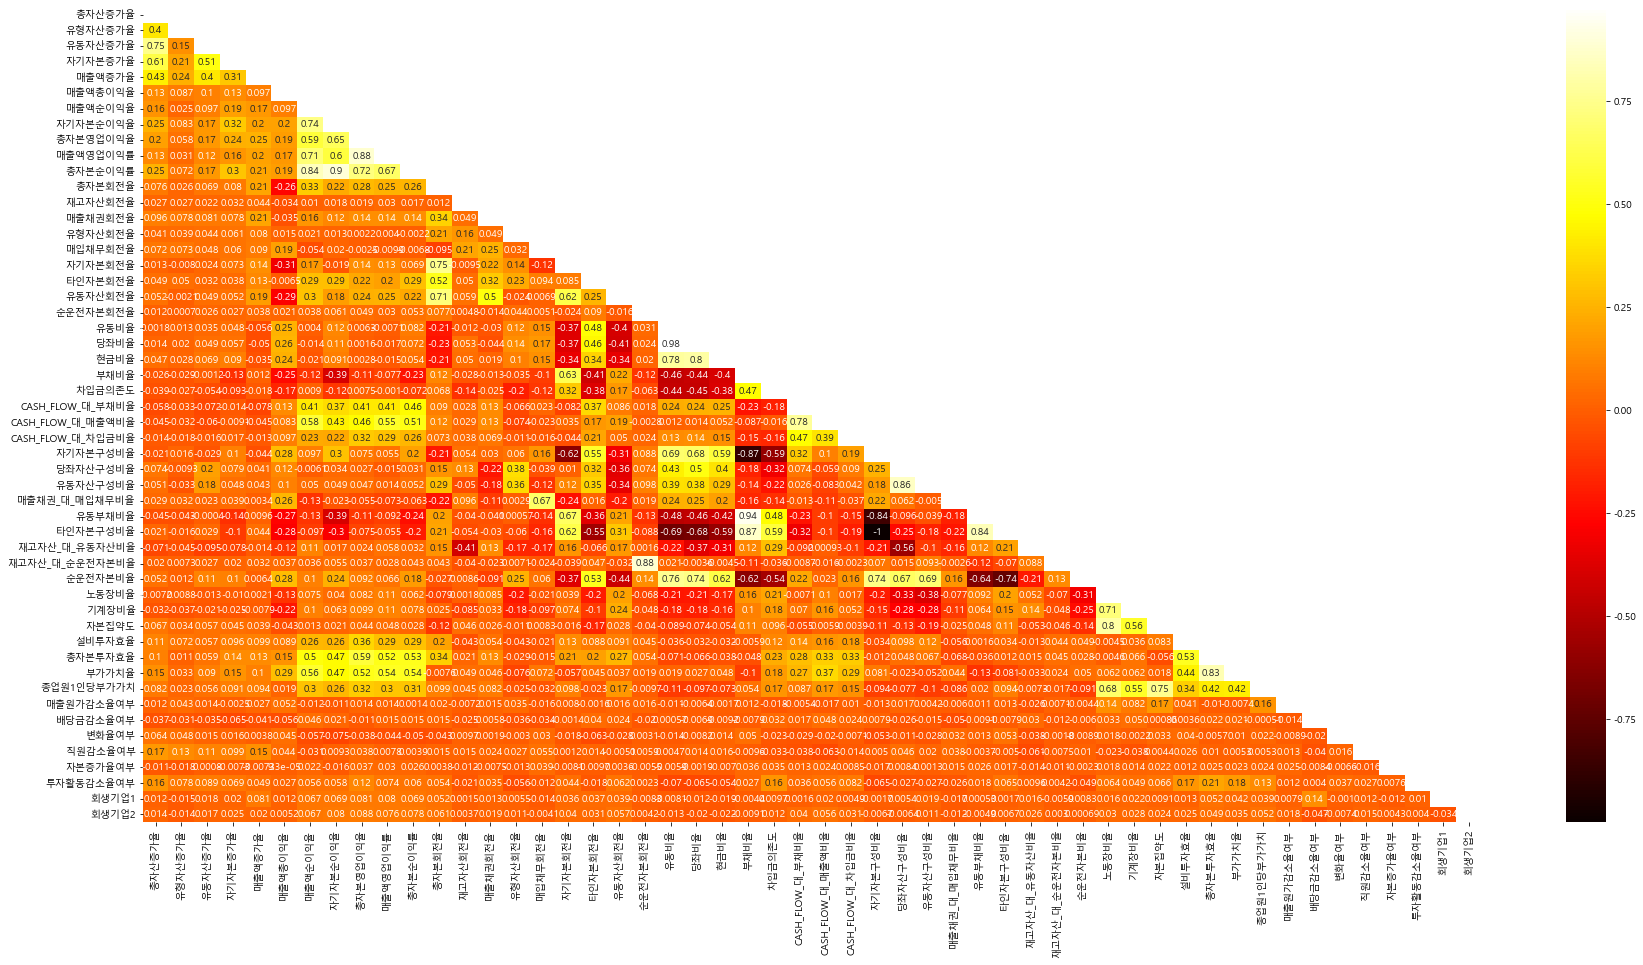

In [11]:
df_corr = x.corr(method='pearson')
mask=np.zeros_like(x.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 한글 깨짐 방지
plt.rc("axes", unicode_minus=False) # 마이너스 부호 깨짐 방지
plt.figure(figsize=(30,15))

sns.heatmap(x.corr(), annot=True, cmap='hot', mask=mask)

In [12]:
# 타겟 정하기
target_one = x['회생기업1']
target_two = x['회생기업2']

# 비율 데이터
df_rate = x.iloc[:,:44]

# 반정형 데이터
df_encoding = x.iloc[:, 45:51]

# # 둘 다 필요할 땐
# df_all = pd.concat([df_rate, df_encoding], axis=1)

In [13]:
df_rate.drop(columns=['자기자본구성비율'], inplace=True)

<AxesSubplot:>

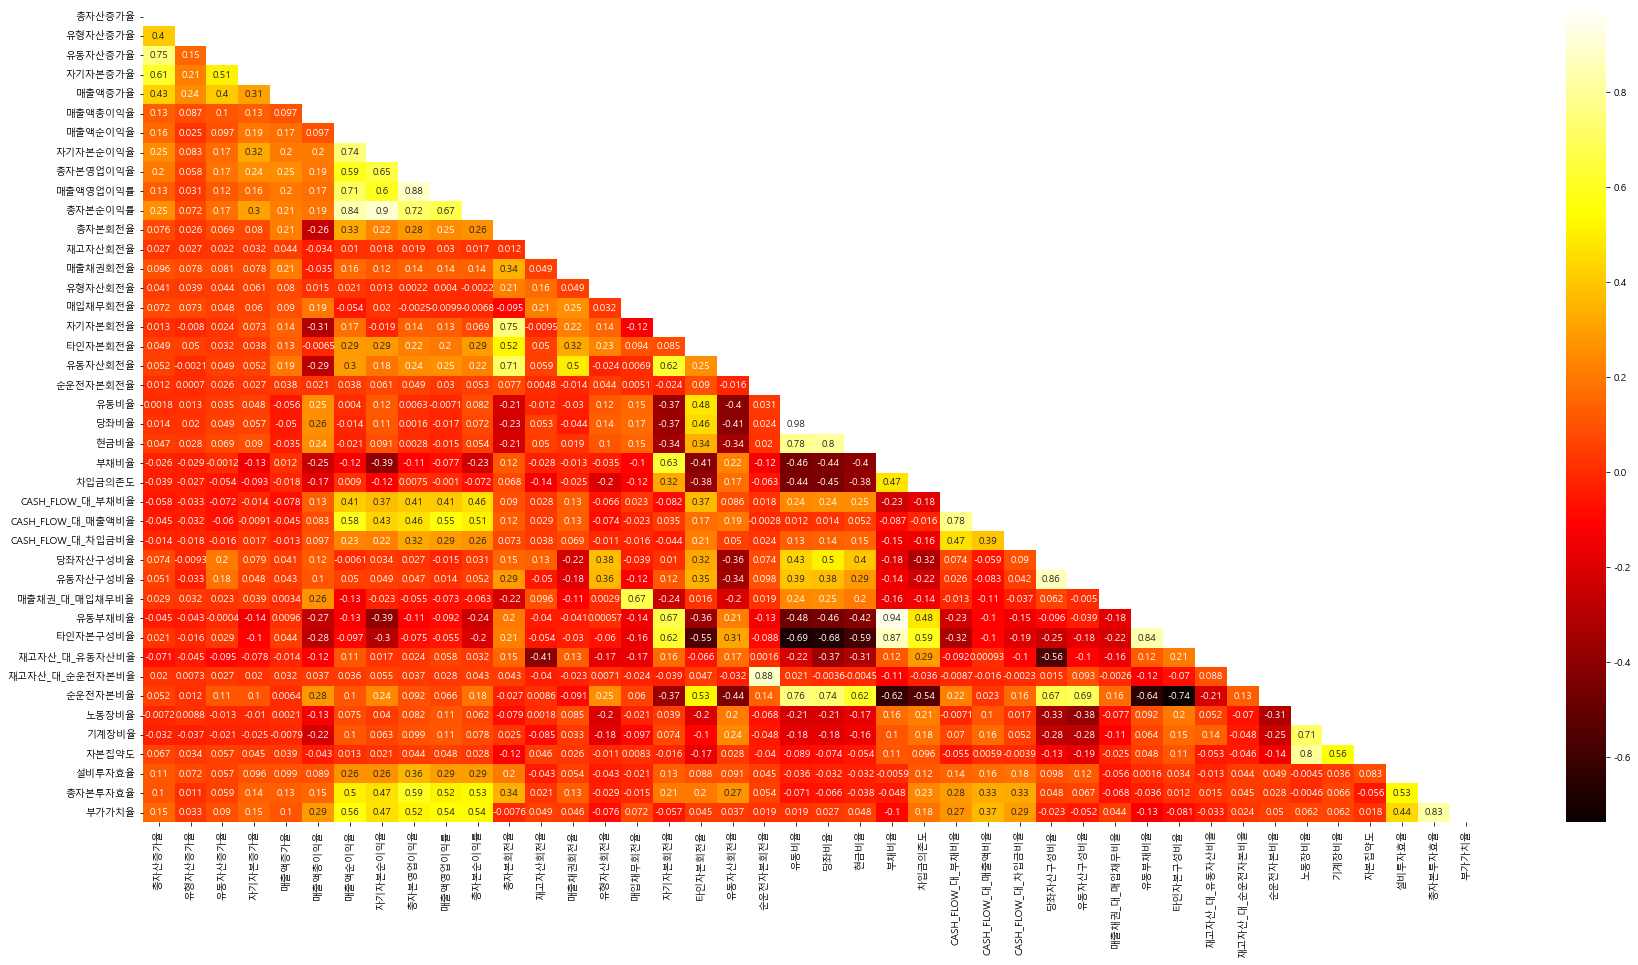

In [14]:
df_corr = df_rate.corr(method='pearson')
mask=np.zeros_like(df_rate.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 한글 깨짐 방지
plt.rc("axes", unicode_minus=False) # 마이너스 부호 깨짐 방지
plt.figure(figsize=(30,15))

sns.heatmap(df_rate.corr(), annot=True, cmap='hot', mask=mask)

In [15]:
df_rate.drop(columns=['회계년도'], inplace=True)

### 정규화

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()

# ############ WARNING ###############
# TEST SET 까지 스케일링 먹이지 마시오 #
# ##################### ##############

# Standard Scaler
ss_sc = SS.fit_transform(df_rate[:5513])
ss_sc2 = pd.DataFrame(ss_sc)

# Robust Scaler
rs_sc = RS.fit_transform(df_rate[:5513])
rs_sc2 = pd.DataFrame(rs_sc)

# Min-Max Scaler
mi_sc = MIN.fit_transform(df_rate[:5513])
mi_sc2 = pd.DataFrame(mi_sc)

In [17]:
ss_sc2.columns = df_rate.columns
rs_sc2.columns = df_rate.columns
mi_sc2.columns = df_rate.columns

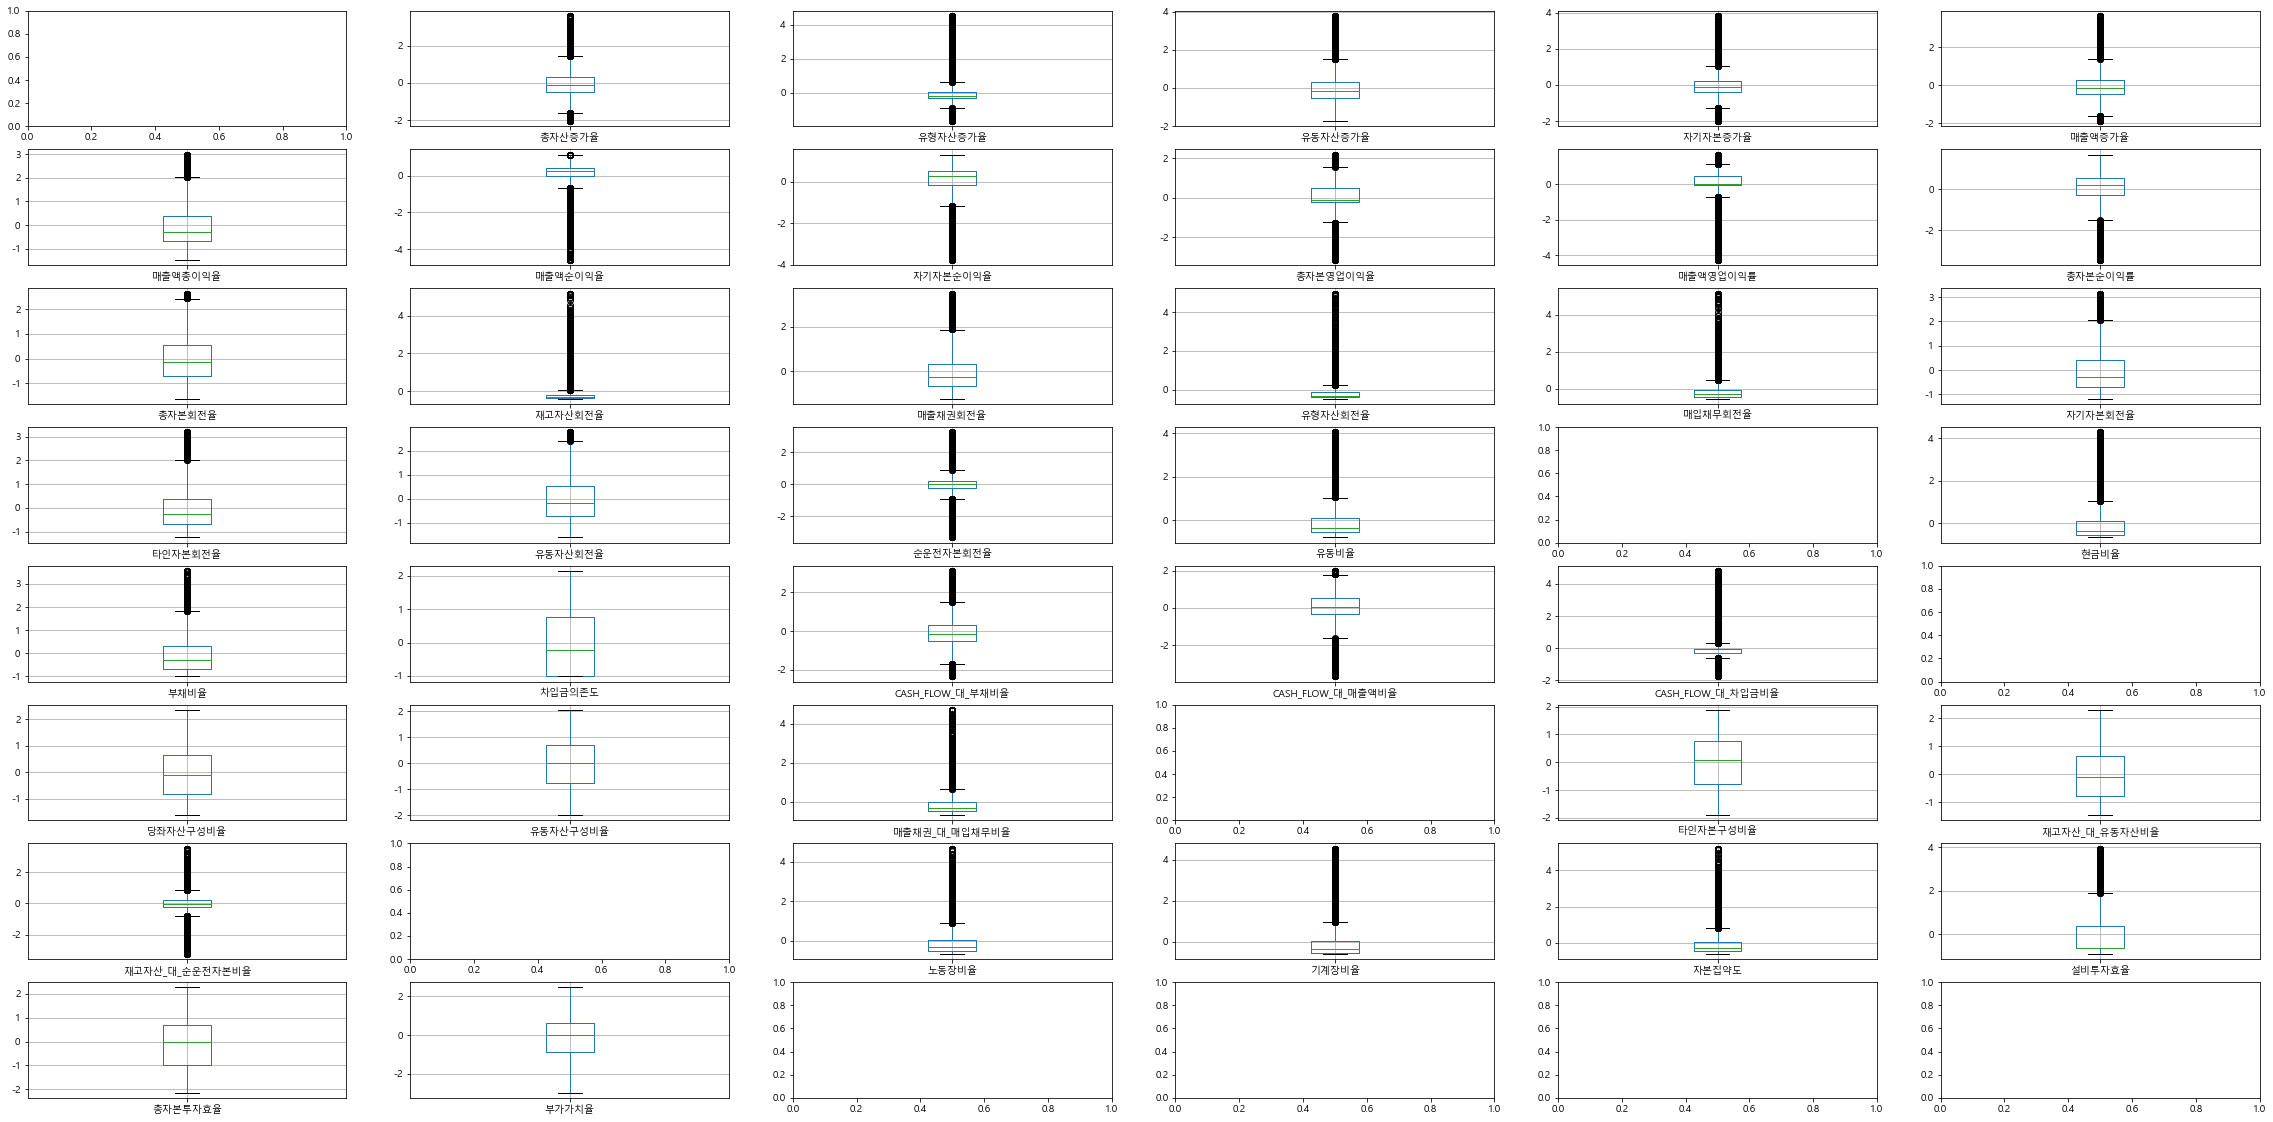

In [18]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

#ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
#ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
#ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
#ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
#ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
#ss_sc2.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

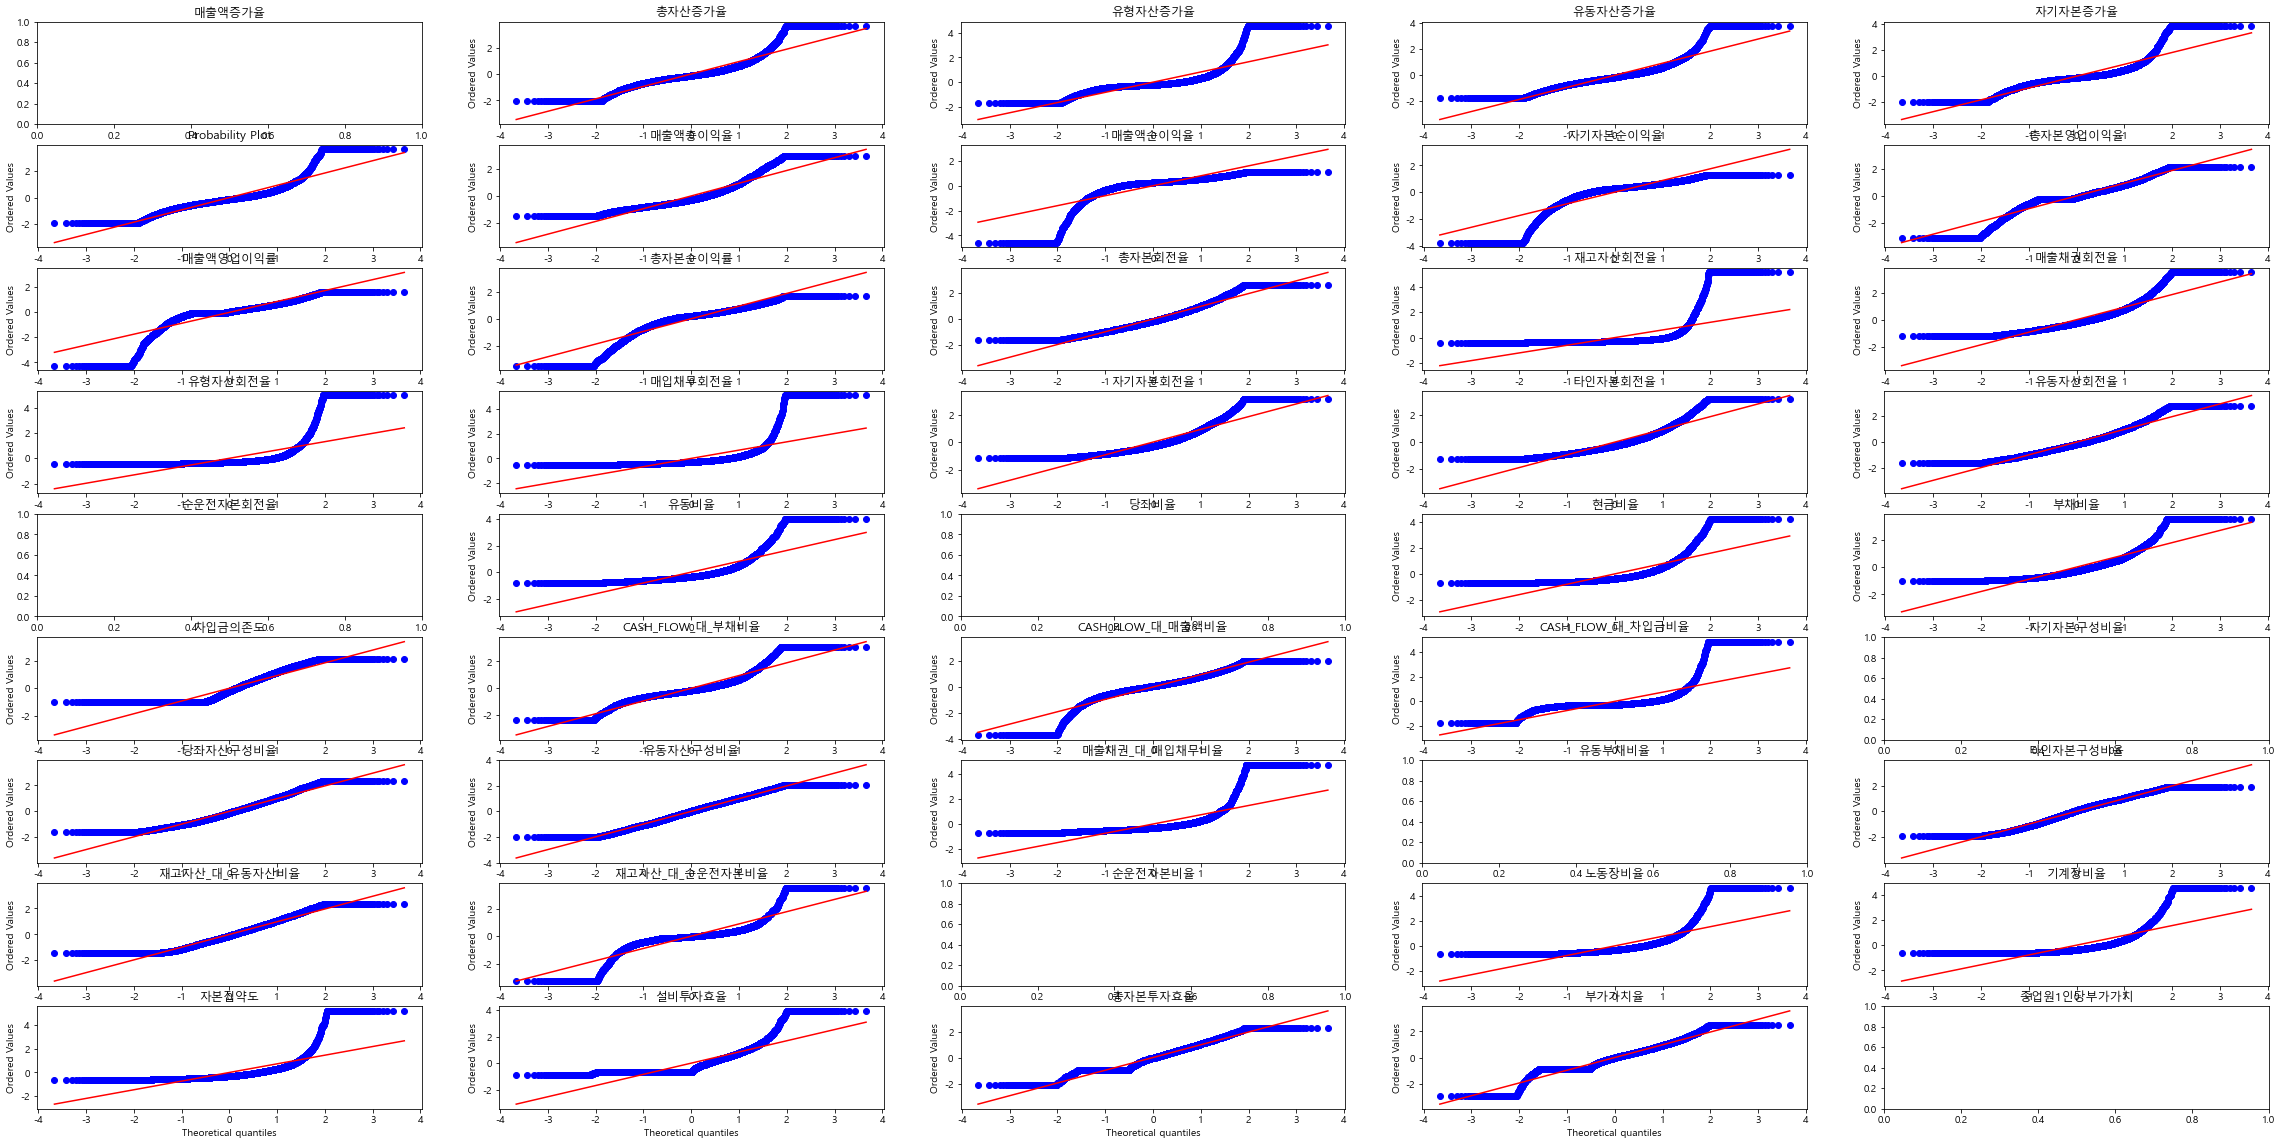

In [19]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

#stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
#stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
#stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
#stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
#stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
#stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
#stats.probplot(ss_sc2['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")

plt.show()

In [20]:
# 둘 다 필요할 땐
ss_all = pd.concat([ss_sc2, df_rate[5513:]])
ss_all = pd.concat([ss_all, df_encoding], axis=1)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_all,i)for i in range(ss_all.shape[1])]
vif['features'] = ss_all.columns


# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,323.506265,유동자산구성비율
1,172.383572,당좌자산구성비율
2,127.967336,유동비율
3,122.711345,당좌비율
4,89.101490,타인자본구성비율
5,65.480171,유동부채비율
6,57.879728,부채비율
7,43.208990,순운전자본비율
8,21.362292,재고자산_대_유동자산비율
9,14.690523,총자본순이익률


In [22]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = target_one
feature = ss_all

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
# feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
#model = sm.OLS(target, feature)
model = sm.OLS(target, feature)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

# with open ('summary_with_const.csv', 'w') as fh:
#     fh.write(fitted_model.summary().as_csv())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  회생기업1   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.051
Method:                 Least Squares   F-statistic:                              10.53
Date:                Wed, 05 Oct 2022   Prob (F-statistic):                    5.45e-75
Time:                        10:14:53   Log-Likelihood:                          1636.8
No. Observations:                8592   AIC:                                     -3178.
Df Residuals:                    8544   BIC:                                     -2839.
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
총자산증가율               -0.0004      0.000     -1.640      0.101      -0.001    8.67e-05
유형자산증가율            2.289e-05   8.55e-05      0.268      0.789      -0.000       0.000
유동자산증가율               0.0002      0.000      0.987      0.324      -0.000       0.000
자기자본증가율           -5.312e-05      0.000     -0.342      0.733      -0.000       0.000
매출액증가율                0.0004      0.000      3.136      0.002       0.000       0.001
매출액총이익율               0.0001      0.000      0.505      0.613      -0.000       0.001
매출액순이익율              -0.0001      0.000     -0.269      0.788      -0.001       0.001
자기자본순이익율             -0.0006      0.000     -1.272      0.203      -0.001       0.000
총자본영업이익율              0.0019      0.002      1.111      0.267      -0.001       0.005
매출액영업이익률              0.0002      0.001      0.203      0.839      -0.002       0.002
총자본순이익률               0.0018      0.001      1.409      0.159      -0.001       0.004
총자본회전율                0.0083      0.005      1.746      0.081      -0.001       0.018
재고자산회전율           -8.334e-05    6.8e-05     -1.226      0.220      -0.000    4.99e-05
매출채권회전율              -0.0002      0.001     -0.134      0.893      -0.003       0.002
유형자산회전율              -0.0001      0.000     -0.494      0.621      -0.001       0.000
매입채무회전율           -8.819e-05      0.000     -0.531      0.595      -0.000       0.000
자기자본회전율               0.0006      0.004      0.172      0.863      -0.006       0.008
타인자본회전율              -0.0009      0.003     -0.342      0.732      -0.006       0.004
유동자산회전율               0.0029      0.004      0.790      0.430      -0.004       0.010
순운전자본회전율             -0.0002      0.000     -0.924      0.356      -0.001       0.000
유동비율               6.087e-06      0.000      0.046      0.963      -0.000       0.000
당좌비율              -1.736e-06      0.000     -0.011      0.991      -0.000       0.000
현금비율                 -0.0001   9.15e-05     -1.209      0.227      -0.000    6.87e-05
부채비율              -8.321e-06      0.000     -0.050      0.960      -0.000       0.000
차입금의존도               -0.0002      0.000     -0.662      0.508      -0.001       0.000
CASH_FLOW_대_부채비율  -8.947e-06      0.000     -0.030      0.976      -0.001       0.001
CASH_FLOW_대_매출액비율    -0.0007      0.001     -1.050      0.294      -0.002       0.001
CASH_FLOW_대_차입금비율 -5.491e-05   4.11e-05     -1.335      0.182      -0.000    2.57e-05
당좌자산구성비율              0.0008      0.001      0.687      0.492      -0.001       0.003
유동자산구성비율             -0.0003      0.001     -0.271      0.786      -0.003       0.002
매출채권_대_매입채무비율     -2.187e-06   1.13e-05     -0.194      0.846   -2.43e-05    1.99e-05
유동부채비율             1.036e-05      0.000      0.043      0.96

In [23]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):

    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")

    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 

    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())

        if not changed:
            break

    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(30,10))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(ss_all,target_one)

                            OLS Regression Results                            
Dep. Variable:                  회생기업1   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     32.37
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.34e-50
Time:                        10:14:56   Log-Likelihood:                 1703.7
No. Observations:                8592   AIC:                            -3389.
Df Residuals:                    8583   BIC:                            -3326.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0403      0.00

In [24]:
## LASSO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
%matplotlib inline

lasso = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(lasso, ss_all, target_one, scoring="neg_mean_squared_error", cv=TimeSeriesSplit(n_splits=6))
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.091 -0.041 -0.041 -0.029 -0.026 -0.029]
 5 folds 의 개별 RMSE scores :  [0.301 0.202 0.204 0.17  0.161 0.172]
 5 folds 의 평균 RMSE : 0.202 


In [25]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.001,0.003,0.005,0.007,0.009]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=ss_all, y_target_n=target_one)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.001일 때 5 폴드 세트의 평균 RMSE: 0.196 


In [ ]:
df_choice = ss_all[['총자산증가율', '유형자산증가율', '자기자본순이익율', '총자본영업이익율', '배당금감소율여부']]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

parameters = {
    'learning_rate' : [0.01, 0.1, 0.3, 0.5], # 매개변수를 얼만큼 이동하면서 찾을까요
    'max_depth' : [3, 5, 7, 10], # 트리의 깊이
    'subsample' : [0.3, 0.5, 0.7, 1], # 모델을 학습할 때 일부 데이터만 써서 트리를 만듬. 0.5인 경우 데이터의 절반씩 랜덤 추출함. 오버피팅 방지도 좋음.
    'n_estimators' : [100, 150, 200, 300, 500, 1000] # 전체 나무의 개수
}

model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, scoring='f1', cv=TimeSeriesSplit(n_splits=6))

In [ ]:
X_train = df_choice[:5513]
y_train = target_one[:5513]
X_test = df_choice[5513:]
y_test = target_one[5513:]

gs_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
gs_model.best_params_

NameError: name 'df_choice' is not defined

In [ ]:
#params = {"learning_rate":0.3, 'max_depth':10, 'n_estimators':300, "subsample":0.5, "random_state":100}
gs_model_two = xgb.XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=150, subsample=0.3, random_state=100)
#grid_model_two = TimeSeriesSplit(gs_model_two, n_splits=6)
#grid_model_two.fit(X_train, y_train)
gs_model_two.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[2883,  115],
       [  76,    5]], dtype=int64)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      2998
         1.0       0.04      0.06      0.05        81

    accuracy                           0.94      3079
   macro avg       0.51      0.51      0.51      3079
weighted avg       0.95      0.94      0.94      3079



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
#smote = SMOTE(random_state=100, sampling_strategy={0:y_train.value_counts().iloc[-1]/2, 1:y_train.value_counts().iloc[-1]})
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("Before : ", X_train.shape, y_train.shape)
print("After : ", X_train_over.shape, y_train_over.shape)
y_train_over.value_counts()

Before :  (5513, 5) (5513,)
After :  (10460, 5) (10460,)


0.0    5230
1.0    5230
Name: 회생기업1, dtype: int64

In [ ]:
gs_model_two.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[2760,  238],
       [  73,    8]], dtype=int64)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95      2998
         1.0       0.03      0.10      0.05        81

    accuracy                           0.90      3079
   macro avg       0.50      0.51      0.50      3079
weighted avg       0.95      0.90      0.92      3079



In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=100)
model_lr.fit(X_train_over, y_train_over)
pred_lr = model_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

0.5427086716466385

In [ ]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

         0.0       0.98      0.54      0.70      2998
         1.0       0.04      0.69      0.07        81

    accuracy                           0.54      3079
   macro avg       0.51      0.62      0.39      3079
weighted avg       0.96      0.54      0.68      3079



In [ ]:
model_lr_origin = LogisticRegression(random_state=100)
model_lr_origin.fit(X_train, y_train)
pred_lr_origin = model_lr_origin.predict(X_test)
accuracy_score(y_test, pred_lr_origin)

0.7742773627801234

In [ ]:
print(classification_report(y_test, pred_lr_origin))

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87      2998
         1.0       0.03      0.26      0.06        81

    accuracy                           0.77      3079
   macro avg       0.50      0.52      0.46      3079
weighted avg       0.95      0.77      0.85      3079



In [ ]:
from imblearn.under_sampling import NearMiss

NM_Model = NearMiss(version = 2)

u_train_X, u_train_Y = NM_Model.fit_resample(X_train, y_train)
u_train_Y.value_counts()

0.0    283
1.0    283
Name: 회생기업1, dtype: int64

In [ ]:
gs_model_two.fit(u_train_X, u_train_Y)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 511, 2487],
       [   1,   80]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29      2998
         1.0       0.03      0.99      0.06        81

    accuracy                           0.19      3079
   macro avg       0.51      0.58      0.18      3079
weighted avg       0.97      0.19      0.29      3079



In [ ]:
model_lr_u = LogisticRegression(random_state=100)
model_lr_u.fit(u_train_X, u_train_Y)
pred_lr_u = model_lr_u.predict(X_test)
accuracy_score(y_test, pred_lr_u)

0.5206235790841183

In [ ]:
print(classification_report(y_test, pred_lr_u))

              precision    recall  f1-score   support

         0.0       0.98      0.52      0.68      2998
         1.0       0.03      0.64      0.07        81

    accuracy                           0.52      3079
   macro avg       0.51      0.58      0.37      3079
weighted avg       0.96      0.52      0.66      3079



In [ ]:
NM_Model_2 = NearMiss(version = 2, sampling_strategy={1:u_train_Y.value_counts().iloc[-1], 0:u_train_Y.value_counts().iloc[-1]*1})
u_train_X, u_train_Y = NM_Model_2.fit_resample(X_train, y_train)
u_train_Y.value_counts()

0.0    283
1.0    283
Name: 회생기업1, dtype: int64

In [ ]:
gs_model_two.fit(u_train_X, u_train_Y)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 474, 2524],
       [   1,   80]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.16      0.27      2998
         1.0       0.03      0.99      0.06        81

    accuracy                           0.18      3079
   macro avg       0.51      0.57      0.17      3079
weighted avg       0.97      0.18      0.27      3079



In [ ]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN

X_samp, Y_samp = SMOTETomek(random_state=100).fit_resample(X_train, y_train)
Y_samp.value_counts()

0.0    5135
1.0    5135
Name: 회생기업1, dtype: int64

In [ ]:
gs_model_two.fit(X_samp, Y_samp)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[2799,  199],
       [  73,    8]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      2998
         1.0       0.04      0.10      0.06        81

    accuracy                           0.91      3079
   macro avg       0.51      0.52      0.50      3079
weighted avg       0.95      0.91      0.93      3079

